<a href="https://colab.research.google.com/github/JdMohamed/machine-learning/blob/main/supervised_machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

# **linear_regression**

📈 What is Linear Regression?
Linear Regression is one of the simplest and most commonly used algorithms in supervised machine learning. It predicts a continuous output based on one or more input features by assuming a linear relationship between them.

🔍 Simple Definition:
Linear regression models the relationship between an independent variable (X) and a dependent variable (Y) using a straight line.

🧮 Formula (Simple Linear Regression):
For one feature:

𝑌
=
𝑎
𝑋
+
𝑏
Y=aX+b
Where:

𝑌
Y: Predicted output

𝑋
X: Input (independent variable)

𝑎
a: Slope (how much Y changes with X)

𝑏
b: Intercept (value of Y when X = 0)

🧠 Goal:
Minimize the error between the predicted values and the actual values using a method like least squares (minimizing the sum of squared errors).

📊 Example:
You want to predict the price of a house based on its size (in square feet).

Size (sqft)	Price ($)
1000	200,000
1500	300,000
2000	400,000

Linear regression will try to fit a line through these points so that you can predict the price of a 1700 sqft house.

🧪 Python Example (with scikit-learn):
python
Copier
Modifier
from sklearn.linear_model import LinearRegression
import numpy as np

# Example data
X = np.array([[1000], [1500], [2000]])  # size in sqft
y = np.array([200000, 300000, 400000])  # price in $

# Create and train model
model = LinearRegression()
model.fit(X, y)

# Predict price for 1700 sqft house
predicted_price = model.predict([[1700]])
print(f"Predicted Price: ${predicted_price[0]:,.2f}")
📈 Visual Representation:
A straight line (best fit) through a scatter plot of data points.


(source: Wikipedia)

🧠 Variants:
Simple Linear Regression: One input feature

Multiple Linear Regression: Multiple input features (e.g., size, number of rooms, location)

✅ Use Cases:
Predicting house prices

Forecasting sales

Estimating costs

Analyzing trends over time

In [ ]:
companies= pd.read_csv('/content/1000_Companies.csv')
companies.head()
X= companies.iloc[:,:-1]
y= companies.iloc[:,4]

In [ ]:
companies.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


<Axes: >

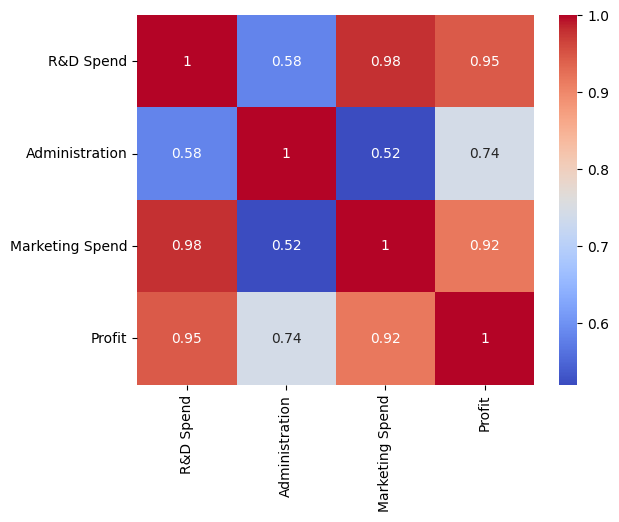

In [ ]:
numerical_cols = companies.select_dtypes(include=np.number).columns
correlation_matrix = companies[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer(
    transformers=[
        ('encoder', OneHotEncoder(), [3])
    ],
    remainder='passthrough'  # Keep the rest of the columns
)

X = ct.fit_transform(X)
print(X)


<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 3997 stored elements and shape (1000, 1002)>
  Coords	Values
  (0, 996)	1.0
  (0, 999)	1.0
  (0, 1000)	136897.8
  (0, 1001)	471784.1
  (1, 995)	1.0
  (1, 997)	1.0
  (1, 1000)	151377.59
  (1, 1001)	443898.53
  (2, 947)	1.0
  (2, 998)	1.0
  (2, 1000)	101145.55
  (2, 1001)	407934.54
  (3, 896)	1.0
  (3, 999)	1.0
  (3, 1000)	118671.85
  (3, 1001)	383199.62
  (4, 882)	1.0
  (4, 998)	1.0
  (4, 1000)	91391.77
  (4, 1001)	366168.42
  (5, 802)	1.0
  (5, 999)	1.0
  (5, 1000)	99814.71
  (5, 1001)	362861.36
  (6, 822)	1.0
  :	:
  (993, 1001)	159075.908
  (994, 591)	1.0
  (994, 999)	1.0
  (994, 1000)	124813.3635
  (994, 1001)	256344.0701
  (995, 331)	1.0
  (995, 997)	1.0
  (995, 1000)	118451.999
  (995, 1001)	173232.6695
  (996, 826)	1.0
  (996, 997)	1.0
  (996, 1000)	130390.08
  (996, 1001)	329204.0228
  (997, 601)	1.0
  (997, 997)	1.0
  (997, 1000)	241926.31
  (997, 1001)	227142.82
  (998, 775)	1.0
  (998, 997)	1.0
  (998, 1000)	321652

In [ ]:
X = X[:, 1:]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [14]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [16]:
y_pred = regressor.predict(X_test)
y_pred

array([ 89896.13560404,  88562.75109756,  94887.30651395, 174747.72023756,
        84341.06631724, 110900.50684928, 169762.18978689,  91541.67798113,
       163730.72563736,  54998.21728997,  67560.89729515, 150188.77595231,
       126199.60384888,  60116.93668766, 175679.15927616,  76424.6731863 ,
       118585.29903066, 163025.85283588, 165373.46410366, 180816.33968842,
       101611.90106507,  85866.61261904, 179941.96170712,  84375.47086056,
       104774.82635513, 101085.99176766,  41176.34613386,  58397.55050945,
        69464.05397504, 226504.894275  , 121059.90611405, 111345.24805057,
       102017.4308966 , 137860.2144515 ,  64646.58373968, 108541.70028035,
       184674.67920308, 170603.23571996, 173734.04591357, 118021.40069485,
        97366.10933911, 163884.28725193, 107433.20380238,  52036.91225355,
       116889.40855343,  59427.16827933, 157865.17674616,  79756.87553344,
       159147.37396752, 131189.93574075, 183744.07931955, 173699.64148019,
        93763.70569404,  

In [20]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)


0.8989590247135772

# **logistic_regression**

:
🔐 What is Logistic Regression?
Despite its name, logistic regression is used for classification, not regression.

🔍 Definition:
Logistic Regression is a supervised machine learning algorithm used to predict the probability that a data point belongs to a particular class.

It is mainly used for binary classification (e.g., yes/no, spam/ham, 0/1).

⚙️ How It Works:
Instead of predicting a continuous value (like linear regression), it predicts the probability of a class using the logistic (sigmoid) function:

𝑃
(
𝑌
=
1
∣
𝑋
)
=
1
1
+
𝑒
−
(
𝑎
𝑋
+
𝑏
)
P(Y=1∣X)=
1+e
−(aX+b)

1
​

The output is a probability between 0 and 1

If the probability > 0.5 → class = 1

Else → class = 0

📊 Example Use Case:
Predict if an email is spam or not.

Feature	Value
Contains "Free"	Yes
Email Length	180 words
Sender in Contact List	No
→ Spam (1) or Not (0)	?

Logistic regression will calculate the probability that it's spam and assign a label based on the threshold (default 0.5).

🧪 Python Example (using scikit-learn):
python
Copier
Modifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

# Load sample data
X, y = load_iris(return_X_y=True)

# To make it binary (just 2 classes)
X = X[y < 2]
y = y[y < 2]

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Train model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict
predictions = model.predict(X_test)

# Accuracy
from sklearn.metrics import accuracy_score
print("Accuracy:", accuracy_score(y_test, predictions))
🧠 Summary
Feature	Logistic Regression
Type	Supervised Learning
Use Case	Classification (binary/multiclass)
Output	Probability → Class label
Function Used	Sigmoid / Logistic Function
Decision Threshold	Usually 0.5
Example Applications	Email spam detection, disease prediction, fraud detection

In [21]:
from ast import increment_lineno
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
%matplotlib inline
digits = load_digits()
print("image data shape", digits.data.shape)
print("label data shape", digits.target.shape)


image data shape (1797, 64)
label data shape (1797,)


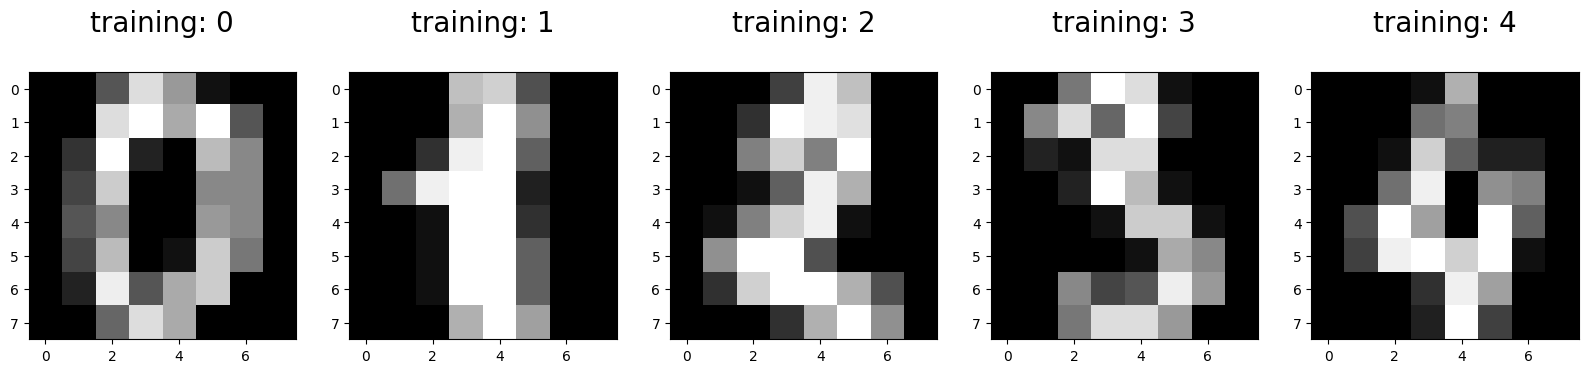

In [25]:
plt.figure(figsize=(20,4))
for index, (image,label) in enumerate(zip(digits.data[0:5],digits.target[0:5])):
  plt.subplot(1,5,index+1)
  plt.imshow(np.reshape(image,(8,8)),cmap=plt.cm.gray)
  plt.title('training: %i\n' % label,fontsize=20)

In [27]:
X_train,x_test,y_train,y_test = train_test_split(digits.data,digits.target,test_size=0.23,random_state=2)

In [29]:
print(X_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1383, 64)
(414, 64)
(1383,)
(414,)


In [32]:
from sklearn.linear_model import LogisticRegression
regressor = LogisticRegression(max_iter=1000)
regressor.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [34]:
predictions = regressor.predict(x_test)
cm = metrics.confusion_matrix(y_test,predictions)
print(cm)

[[37  0  0  0  1  0  0  0  0  0]
 [ 0 45  0  1  0  0  0  0  1  1]
 [ 0  0 43  0  0  0  0  0  0  0]
 [ 0  0  0 40  0  0  0  1  1  0]
 [ 0  0  0  0 34  0  0  0  3  1]
 [ 0  1  0  0  1 44  0  0  0  0]
 [ 0  1  0  0  0  0 39  0  1  0]
 [ 0  0  0  0  0  0  0 45  0  1]
 [ 0  1  0  0  0  0  0  0 36  1]
 [ 0  0  0  2  0  1  0  0  1 30]]


In [37]:
score = metrics.accuracy_score(y_test,predictions)
print(score)

0.9492753623188406
